<a href="https://colab.research.google.com/github/choijongha/Titanic-Passenger-Survival-Prediction-Model/blob/main/Titanic_Passenger_Survival_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 타이타닉 승객 생존 예측 문제 설명

*   총 892개의 레코드로 구성되며 11개의 피쳐와 레이블 필드(생존여부)로 구성
*   2번째 필드(Survived)가 바로 예측해야 하는 승객 생존 여부를 나타냄

 필드 이름                 설명
1. PassengerId:           승객에게 주어진 일련번호
2. Survived:              생존여부를 나타내는 레이블 정보
3. Pclass:                티켓클래스. 1 = 1st, 2 = 2nd, 3 = 3rd
4. Name:                  승객의 이름
5. Gender:                승객의 성별
6. Age:                   승객의 나이
7. SibSp:                 같이 승선한 형제/자매와 배우자의 수
8. Parch:                 같이 승선한 부모와 자녀의 수
9. Ticket:                티켓 번호
10. Fare:                 운임의 값
11. Cabin:                숙소 번호
12. Embarked:             승선한 항구. C = Cherbourg, Q = Queenstown, S = Southampton


## 트레이닝 셋 로딩

In [ ]:
import pandas as pd
import numpy as np

train = pd.read_csv("https://s3-geospatial.s3-us-west-2.amazonaws.com/train.csv")

In [ ]:
train.shape

(891, 12)

In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train.head(10)

각종 통계 자료 보기

In [ ]:
train.info()

In [ ]:
train.describe()

성별 정보 더 자세히 보기

In [ ]:
train['Sex'].unique()

In [ ]:
train.groupby(['Sex','Survived']).size()

In [ ]:
train.groupby(['Sex','Survived']).size().plot()

In [ ]:
train.groupby(['Sex','Survived']).size().plot(kind='bar')

In [ ]:
train.groupby(['Sex','Survived']).size().plot(kind='bar', color=['blue', 'red', 'blue', 'red'])

In [ ]:
train.value_counts(subset=['Sex', 'Survived'])

In [ ]:
train.value_counts(subset=['Sex', 'Survived']).sort_index()

In [ ]:
train.value_counts(subset=['Sex', 'Survived']).sort_index().plot(kind='bar')

승선 항구 정보 더 자세히 보기

In [ ]:
train["Embarked"].unique()

In [ ]:
train.groupby(['Embarked','Survived']).size()

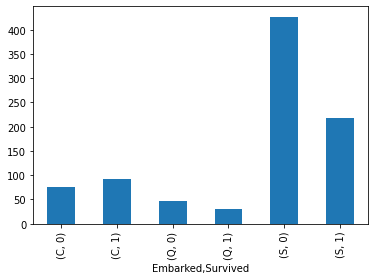

In [ ]:
train.groupby(['Embarked','Survived']).size().plot(kind='bar')

# 모델 빌딩

## 트레이닝 셋 전처리

*   Sex라는 컬럼은 문자열 타입이며 머신러닝 알고리즘들은 숫자타입 밖에 이해하지 못함
*   이를 숫자 타입으로 변환. male은 1로 female은 0으로 변환
*   보통 Scikit Learn에서는 이를 StringIndexer라는 모듈로 변환해줌.

여기서는 조금더 간단하게 numpy의 where를 이용해 Gender라는 새로운 컬럼을 생성

In [ ]:
train['Gender'] = np.where(train['Sex'] == 'male', 1, 0)

NameError: ignored

In [ ]:
train.head(6)

In [ ]:
# Gender 1 (Male) and Survived 1 negatively correlated 
train["Gender"].corr(train["Survived"]) 

### 기타 필드들 상관 관계 보기

In [ ]:
train["Pclass"].corr(train["Survived"]) 

In [ ]:
train["SibSp"].corr(train["Survived"]) 

In [ ]:
train["Parch"].corr(train["Survived"]) 

### Age 정보가 없는 승객 레코드 채우기


*   여기서는 dataframe의 fillna 함수를 이용해서 평균값으로 채움
*   Scikit-Learn에서는 Imputer라는 클래스를 이용하는 것이 일반적



In [ ]:
train = train.fillna(value={'Age': 29.7})

In [ ]:
train.head(6)

### 정규화

*   본 실습에서 하지는 않지만 숫자 값의 범위를 0과 1 혹은 -1과 1 처럼 특정 범위로 정규화하는 것이 
*   scikit-learn에서는 Scaler를 이용해 이를 수행한다

### 최종 트레이닝 셋 빌딩

In [ ]:
train = train.drop(
  ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Sex', 'Embarked', 'Parch', 'SibSp'],
  axis=1
)

In [ ]:
train.head(10)

In [ ]:
train.info()

## 모델 빌딩

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [ ]:
# Logistic Regression 모델 만들기
lr = LogisticRegression(random_state=1)

## 두 가지 종류의 모델 성능 테스트

*   Hold out 테스트: train_test_split
*   Cross Validation 테스트: cross_validate

## Hold Out 테스트 (교차분석 테스트)

In [ ]:
X = train[["Pclass", "Gender", "Age"]]
y = train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [ ]:
X_train.shape

(712, 3)

In [ ]:
X_train.head(5)

,Pclass,Gender,Age
58,2,0,5.0
375,1,0,29.7
635,2,0,28.0
590,3,1,35.0
623,3,1,21.0


In [ ]:
y_train.head(5)

58     1
375    1
635    1
590    0
623    0
Name: Survived, dtype: int64

In [ ]:
log_reg = lr.fit(X_train, y_train)

## 모델 검증

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
X_test.head()

NameError: ignored

In [ ]:
y_test.head()

In [ ]:
expected   = y_test
predicted  = log_reg.predict(X_test)

In [ ]:
predicted

In [ ]:
predicted_prob = log_reg.predict_proba(X_test)

In [ ]:
predicted_prob

In [ ]:
predicted_prob = log_reg.predict_proba(X_test)[:,1]

In [ ]:
predicted_prob

In [ ]:
classificationReport = classification_report(expected, predicted)
print(classificationReport)

In [ ]:
# 예측되는 값은 0 혹은 1이 되며 0은 생존하지 못했음을 나타내고 1은 생존했음을 나타낸다. 이걸 더 분명하게 하고 싶다면 
# target_names 컬럼을 이용해 0을 Died로 표현하고 1을 Survived로 표현하자

classificationReport = classification_report(expected, predicted, target_names=["Died", "Survived"])
print(classificationReport)

## ROC 커브 그려보고 AUC 계산해보기

*   https://nittaku.tistory.com/295, https://nittaku.tistory.com/297 참조


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

fpr,tpr,_ = roc_curve(expected, predicted_prob)
plt.plot(fpr,tpr)

NameError: ignored

In [ ]:
auc(fpr, tpr)

## 예측 테스트

In [ ]:
# Pclass	Gender	Age
test = [
    [1, 0, 80],
    [3, 1, 75]
]
print(log_reg.predict(test))

[1 0]


In [ ]:
print(log_reg.predict_proba(test))

[[0.3647288  0.6352712 ]
 [0.98415545 0.01584455]]


### 보너스 나이 (age) 시각화

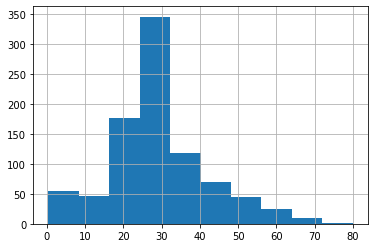

In [ ]:
train["Age"].hist()

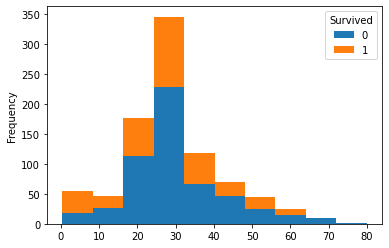

In [ ]:
train.pivot(columns='Survived').Age.plot(kind = 'hist', stacked=True)